## Loading Packages

In [4]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import matplotlib.pyplot as plt

## Importing .csv Data

In [8]:

import pandas as pd

try:
    # Try reading the CSV file with UTF-8 encoding
    dataframe = pd.read_csv("Data.csv", encoding="utf-8")
except UnicodeDecodeError:
    # If UTF-8 fails, try reading with ISO-8859-1 encoding
    dataframe = pd.read_csv("Data.csv", encoding="ISO-8859-1")  

# Display the first few rows of the DataFrame
print(dataframe.head())



          name  online_order  offline_order  old_customers  new_customer  \
0  Jowi Center            30            106            123            13   
1       Kalama             4             88             80            12   
2   Sugar Belt            45              1             42             4   
3       Pundo             34            212            223            23   
4   Alot Nyale            72            293            298            67   

   rating/10  approved  price(for two couples) dish_type  
0        5.2        28                     480  Cocktail  
1        5.6        22                     180  Cocktail  
2        6.0        39                     350  Cocktail  
3        6.0       153                    1500  Cocktail  
4        7.4       146                     920  Cocktail  


## Summary of the dataframe

# Data Shape

In [9]:
dataframe.shape

(114, 9)

# Dataframe Information

In [10]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   name                    114 non-null    object 
 1   online_order            114 non-null    int64  
 2   offline_order           114 non-null    int64  
 3   old_customers           114 non-null    int64  
 4   new_customer            114 non-null    int64  
 5   rating/10               114 non-null    float64
 6   approved                114 non-null    int64  
 7   price(for two couples)  114 non-null    int64  
 8   dish_type               114 non-null    object 
dtypes: float64(1), int64(6), object(2)
memory usage: 8.1+ KB


# Data Cleaning

# Drop null Values

In [11]:
new_dataset = dataframe.dropna()

## Data Analysis

## Number of Customers Served by each Hotel

In [17]:
import pandas as pd

try:
    # Try reading the CSV file with UTF-8 encoding
    dataframe = pd.read_csv("Data.csv", encoding="utf-8")
except UnicodeDecodeError:
    # If UTF-8 fails, try reading with ISO-8859-1 encoding
    dataframe = pd.read_csv("Data.csv", encoding="ISO-8859-1") 

# Ensure the columns are numeric
dataframe['new_customer'] = pd.to_numeric(dataframe['new_customer'], errors='coerce')
dataframe['old_customers'] = pd.to_numeric(dataframe['old_customers'], errors='coerce')

# Handle missing values if necessary, for example, fill NaN with 0
dataframe['new_customer'].fillna(0, inplace=True)
dataframe['old_customers'].fillna(0, inplace=True)

# Create the new column by summing new and old customers
dataframe['total_customers'] = dataframe['new_customer'] + dataframe['old_customers']

# Display the updated dataframe
print(dataframe.head())



          name  online_order  offline_order  old_customers  new_customer  \
0  Jowi Center            30            106            123            13   
1       Kalama             4             88             80            12   
2   Sugar Belt            45              1             42             4   
3       Pundo             34            212            223            23   
4   Alot Nyale            72            293            298            67   

   rating/10  approved  price(for two couples) dish_type  total_customers  
0        5.2        28                     480  Cocktail              136  
1        5.6        22                     180  Cocktail               92  
2        6.0        39                     350  Cocktail               46  
3        6.0       153                    1500  Cocktail              246  
4        7.4       146                     920  Cocktail              365  


C:\Users\JBwana\AppData\Local\Temp\ipykernel_14912\75175062.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataframe['new_customer'].fillna(0, inplace=True)
C:\Users\JBwana\AppData\Local\Temp\ipykernel_14912\75175062.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For ex

# Total Number of Customers Served in Decresing Order

In [18]:

# Sort the dataframe by 'total_customers' in decreasing order
dataframe = dataframe.sort_values(by='total_customers', ascending=False)

# Display the top 5 rows with only 'name' and 'total_customers' columns
top_5_customers = dataframe[['name', 'total_customers']].head(5)

# Display the top 5 rows
print(top_5_customers)

           name  total_customers
58   Rola Pilau             2288
38    Café Noma             1852
48  Keth Nyingi             1248
30  Dalaru Café             1196
77    Huma Manu             1187


## Favourite Dish as per the Hotels

C:\Users\JBwana\AppData\Local\Temp\ipykernel_14912\1481040547.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=dataframe['dish_type'], palette="Set2")  # Change palette for different colors


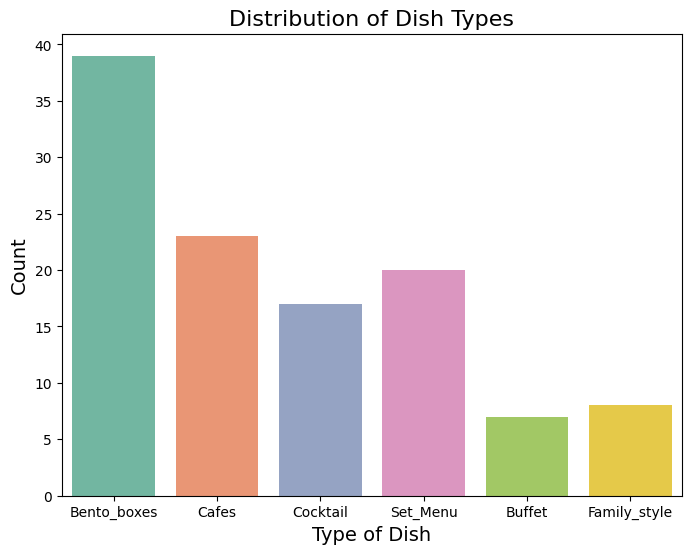

In [19]:

# Set figure size
plt.figure(figsize=(8, 6))

# Create count plot with different colors for each bar
sns.countplot(x=dataframe['dish_type'], palette="Set2")  # Change palette for different colors

# Label the x-axis
plt.xlabel("Type of Dish", fontsize=14)

# Label the y-axis
plt.ylabel("Count", fontsize=14)

# Add title
plt.title("Distribution of Dish Types", fontsize=16)

# Show the plot
plt.show()


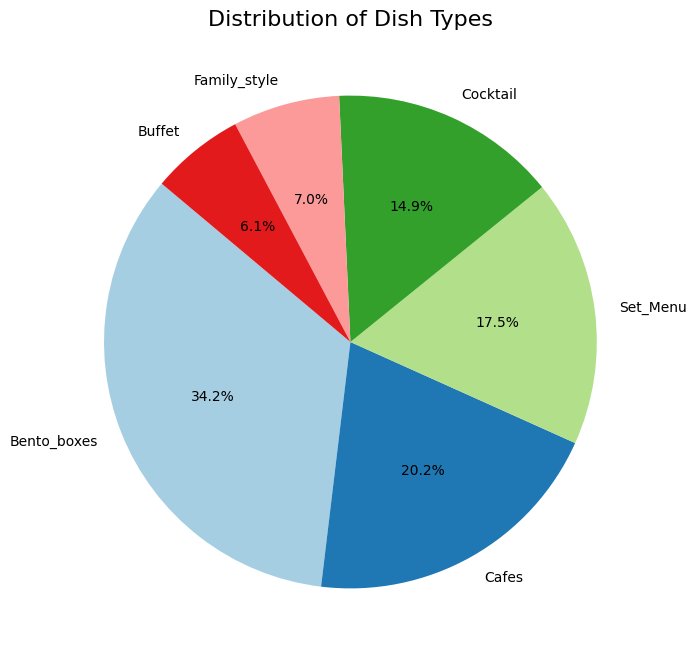

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count occurrences of each dish type
dish_counts = dataframe['dish_type'].value_counts()

# Create Pie Chart
plt.figure(figsize=(8, 8))
plt.pie(dish_counts, labels=dish_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)

# Add Title
plt.title("Distribution of Dish Types", fontsize=16)

# Show Plot
plt.show()


## Approvals per Dish

# Line Graph

Text(0, 0.5, 'Approved')

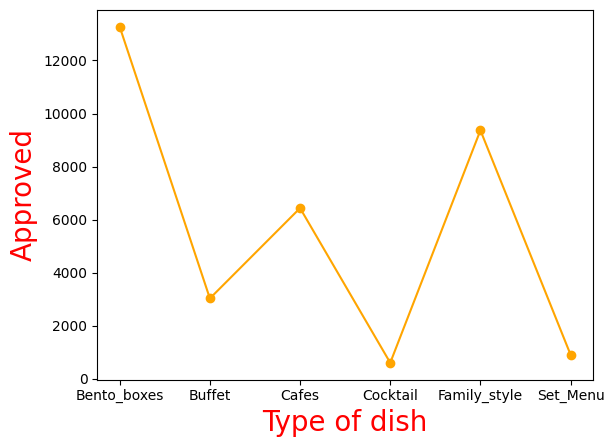

In [21]:
grouped_data = dataframe.groupby('dish_type')['approved'].sum()
result = pd.DataFrame({'agreed': grouped_data})
plt.plot(result, c='orange', marker='o')
plt.xlabel('Type of dish', c='red', size=20)
plt.ylabel('Approved', c='red', size=20)

# Bar Chart

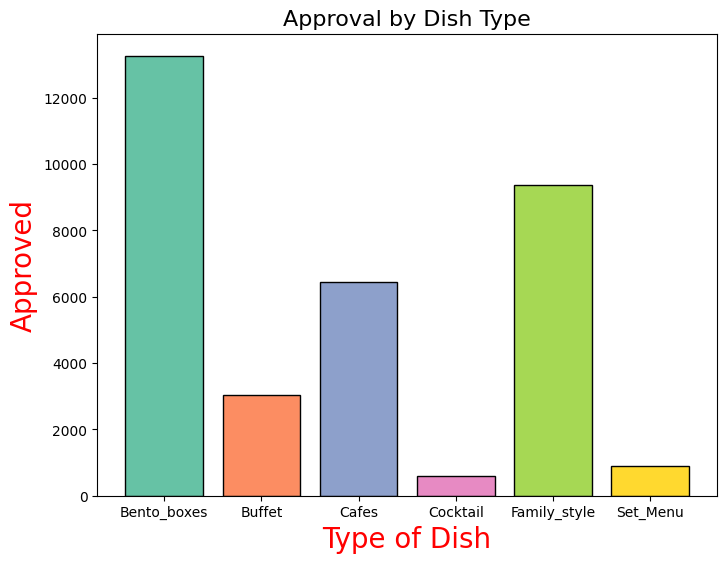

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  # Import seaborn for color palettes

# Group data by 'dish_type' and sum the 'approved' values
grouped_data = dataframe.groupby('dish_type')['approved'].sum()

# Convert to DataFrame
result = pd.DataFrame({'agreed': grouped_data})

# Create a bar chart
plt.figure(figsize=(8, 6))

# Use Seaborn color palette and pass it to Matplotlib
colors = sns.color_palette("Set2", len(result))  
plt.bar(result.index, result['agreed'], color=colors, edgecolor='black')

# Label the axes
plt.xlabel('Type of Dish', color='red', fontsize=20)
plt.ylabel('Approved', color='red', fontsize=20)

# Add a title
plt.title('Approval by Dish Type', fontsize=16)

# Show the plot
plt.show()



# Pie Chart

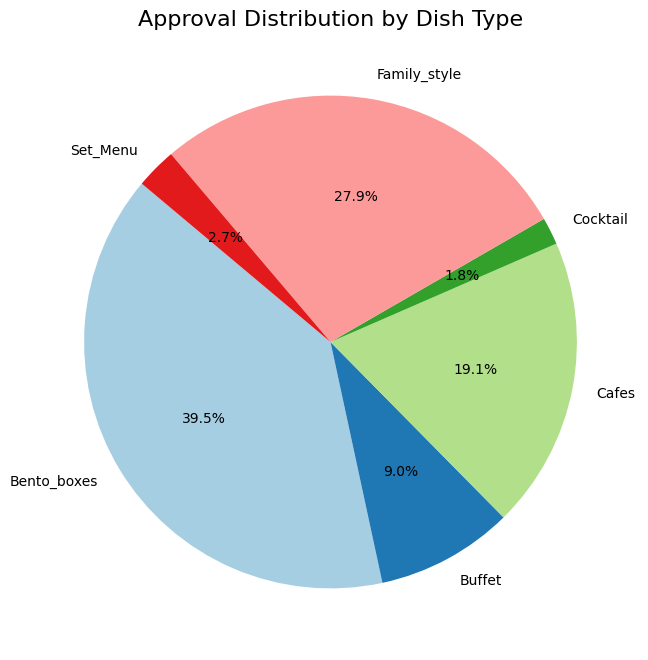

In [26]:
import matplotlib.pyplot as plt

# Group the data by dish_type and sum the 'approved' column
grouped_data = dataframe.groupby('dish_type')['approved'].sum()

# Create a pie chart
plt.figure(figsize=(8, 8))  # Set figure size
plt.pie(grouped_data, labels=grouped_data.index, autopct='%1.1f%%', 
        startangle=140, colors=plt.cm.Paired.colors)

# Add title
plt.title("Approval Distribution by Dish Type", fontsize=16)

# Show the plot
plt.show()


# Hotel with the Highest Approval

In [28]:
import pandas as pd

# Maximum number of approvals
max_votes = dataframe['approved'].max()

# Get the restaurant(s) with the maximum approvals
restaurant_with_max_votes = dataframe.loc[dataframe['approved'] == max_votes, ['name', 'approved']]

# Print the result
print('Restaurant(s) with the maximum votes:')
print(restaurant_with_max_votes)


Restaurant(s) with the maximum votes:
       name  approved
109  Masiku      4884


C:\Users\JBwana\AppData\Local\Temp\ipykernel_14912\836814643.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=dataframe['online_order'], palette="Set2")


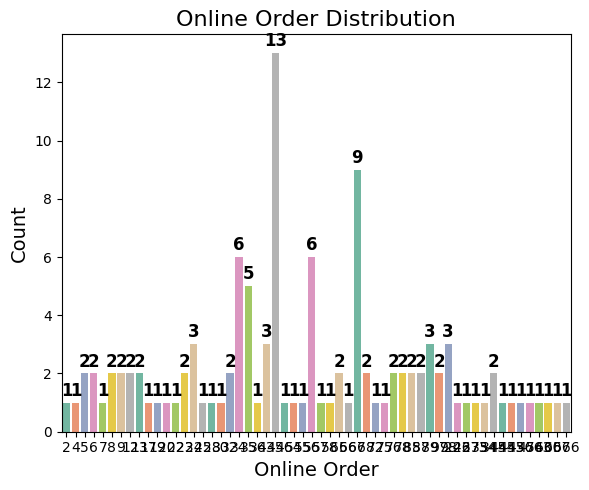

## Rating Distribution

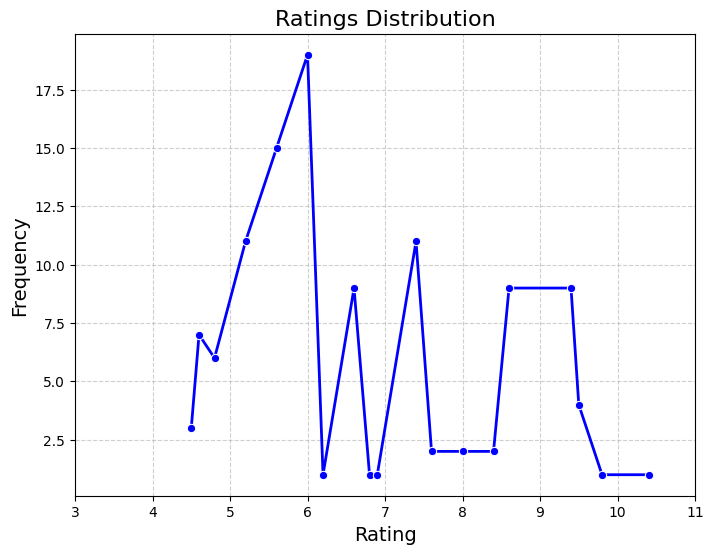

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Sample dataframe (Replace this with your actual dataframe)
# dataframe = pd.read_csv("your_data.csv")

# Summarize data: count occurrences of each rating
rating_counts = dataframe['rating/10'].value_counts().reset_index()
rating_counts.columns = ['Rating', 'Frequency']
rating_counts = rating_counts.sort_values('Rating')  # Sort for a proper line plot

# Create line plot
plt.figure(figsize=(8, 6))
sns.lineplot(x=rating_counts['Rating'], y=rating_counts['Frequency'], marker='o', color='blue', linewidth=2)

# Customize plot appearance
plt.title('Ratings Distribution', fontsize=16)
plt.xlabel('Rating', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(range(3, 12, 1))  # Set x-axis from 3 to 11 with intervals of 1
plt.grid(True, linestyle='--', alpha=0.6)  # Add grid for better readability

# Show plot
plt.show()


# Majority of Hotels received average ratings of 6/10

## Preferance of Couples

C:\Users\JBwana\AppData\Local\Temp\ipykernel_14912\1872459299.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=dataframe['price(for two couples)'], palette="Set2")


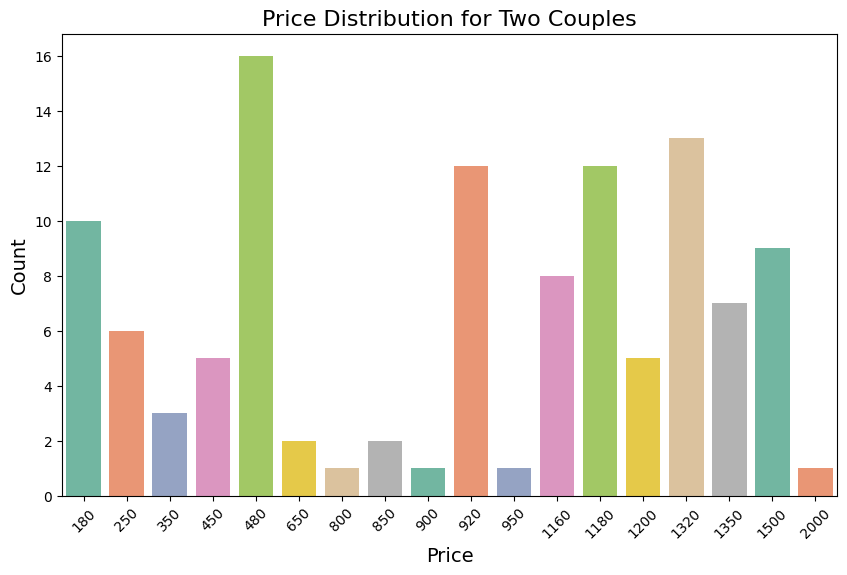

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the count plot
plt.figure(figsize=(10, 6))
sns.countplot(x=dataframe['price(for two couples)'], palette="Set2")

# Rotate x-axis labels
plt.xticks(rotation=45)

# Add labels and title
plt.title("Price Distribution for Two Couples", fontsize=16)
plt.xlabel("Price", fontsize=14)
plt.ylabel("Count", fontsize=14)

# Show the plot
plt.show()


# Conclusion: Most couples in pairs like hotels with prices approximately Ksh 480

In [ ]:
# Comparison of Online and Offline Orders bt Dish Type

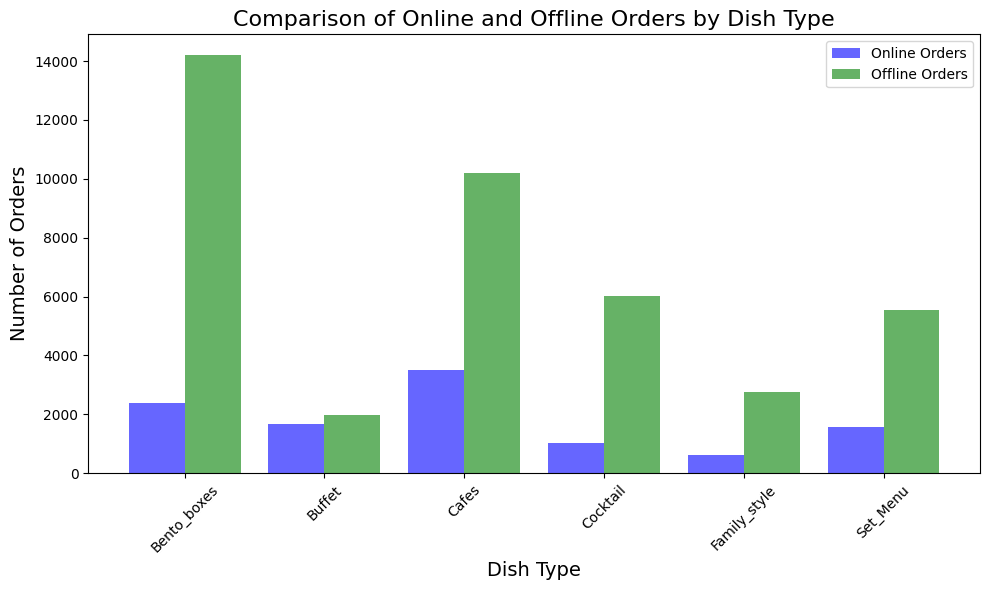

In [57]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

try:
    # Try reading the CSV file with UTF-8 encoding
    dataframe = pd.read_csv("Data.csv", encoding="utf-8")
except UnicodeDecodeError:
    # If UTF-8 fails, try reading with ISO-8859-1 encoding
    dataframe = pd.read_csv("Data.csv", encoding="ISO-8859-1") 

# Clean column names in case of leading/trailing spaces
dataframe.columns = dataframe.columns.str.strip()

# Group by 'dish_type' and sum the online_order and offline_order
data_grouped = dataframe.groupby('dish_type')[['online_order', 'offline_order']].sum().reset_index()

# Create an index for positioning the bars
x = np.arange(len(data_grouped['dish_type']))  # Numeric positions for x-axis

# Bar width to prevent overlap
bar_width = 0.4

# Plotting the comparison of online and offline orders by dish_type
plt.figure(figsize=(10, 6))
plt.bar(x - bar_width/2, data_grouped['online_order'], width=bar_width, label='Online Orders', color='blue', alpha=0.6)
plt.bar(x + bar_width/2, data_grouped['offline_order'], width=bar_width, label='Offline Orders', color='green', alpha=0.6)

# Adding title and labels
plt.title('Comparison of Online and Offline Orders by Dish Type', fontsize=16)
plt.xlabel('Dish Type', fontsize=14)
plt.ylabel('Number of Orders', fontsize=14)
plt.xticks(x, data_grouped['dish_type'], rotation=45)  # Rotate x-axis labels for readability

# Display legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()







## Conclusion: Most dishes were ordered offline with Bento_boxes having the highest. 

## Dishes that are mostly ordered online 

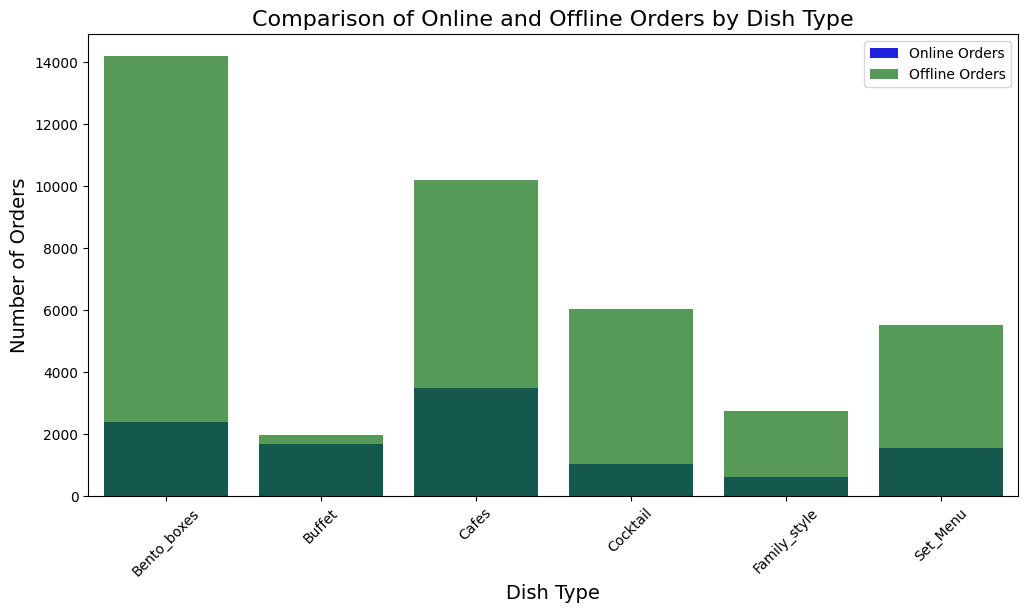

In [60]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

try:
    # Try reading the CSV file with UTF-8 encoding
    dataframe = pd.read_csv("Data.csv", encoding="utf-8")
except UnicodeDecodeError:
    # If UTF-8 fails, try reading with ISO-8859-1 encoding
    dataframe = pd.read_csv("Data.csv", encoding="ISO-8859-1") 

# Clean column names in case of leading/trailing spaces
dataframe.columns = dataframe.columns.str.strip()

# Group by 'dish_type' and sum online and offline orders
data_grouped = dataframe.groupby('dish_type')[['online_order', 'offline_order']].sum().reset_index()

# Plot grouped bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='dish_type', y='online_order', data=data_grouped, color='blue', label='Online Orders')
sns.barplot(x='dish_type', y='offline_order', data=data_grouped, color='green', label='Offline Orders', alpha=0.7)

# Labels and title
plt.title("Comparison of Online and Offline Orders by Dish Type", fontsize=16)
plt.xlabel("Dish Type", fontsize=14)
plt.ylabel("Number of Orders", fontsize=14)
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.legend()

plt.show()
